<a href="https://colab.research.google.com/github/AnastasiyaRahulina/Clusterisation_learning/blob/main/%D0%A0%D0%B0%D0%B3%D1%83%D0%BB%D0%B8%D0%BD%D0%B0_%D0%94%D0%97_3_ML_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Домашнее задание по теме "Основы задач кластеризации"

Имеются [данные](https://github.com/obulygin/content/blob/main/country_data/Country-data.csv) по экономическим и демографическим показателям стран за "неопределенный" год.  
Нас интересуют 2 показателя:
- health - затраты на здравоохранение в % от ВВП.
- life_expec - ожидаемая продолжительность жизни.

Вам необходимо:  
1) Прочитать данные.  
2) На основе двух показатель кластеризовать 2 страны на n-групп (количество кластеров определить самостоятельно), используя минимум 2 алгоритма кластеризации.   
3) Построить графики по результатам кластеризации.  
4) Проинтерпретировать результат (описать полученные группы) и написать вывод о наиболее подходящем алгоритме с точки зрения осмысленного результата.

Не забывайте про подготовку данных, которая может быть обязательна для некоторых алгоримтов.


*Сопровождайте все действия, которые могут предполагать альтернативные способы реализации, обоснованием*.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/mathshub/ml/Country-data.csv')

In [ ]:
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


<Axes: xlabel='health', ylabel='life_expec'>

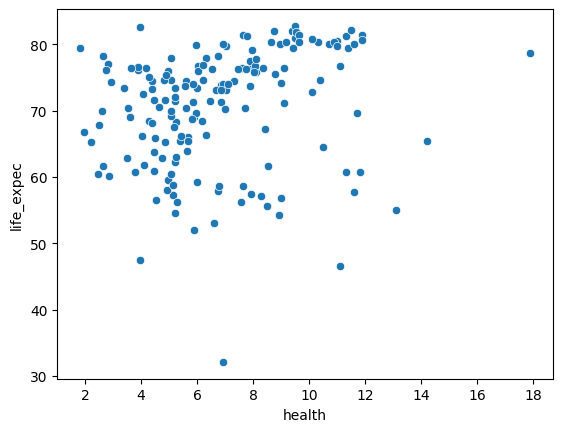

In [ ]:
# визуализируем данные, по которым будет проводится кластеризация
sns.scatterplot(x=df['health'], y=df['life_expec'])

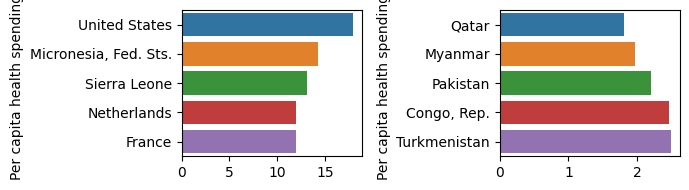

In [ ]:
# рассмотрим показатели поближе, заодно можно будет получить информацию по выбросам
# затраты на здравоохранение в % от ВВП
fig, ax = plt.subplots(1, 2, figsize=(7, 2))
top10 = df[['country','health']].sort_values('health', ascending = False).head(5)
bottom10 = df[['country','health']].sort_values('health', ascending = True).head(5)
plt1 = sns.barplot(x='health', y='country', data= top10, ax=ax[0])
plt2 = sns.barplot(x='health', y='country', data= bottom10, ax=ax[1])
plt1.set(xlabel = '', ylabel= 'Per capita health spendings')
plt2.set(xlabel = '', ylabel= 'Per capita health spendings')
plt.tight_layout()

<Axes: >

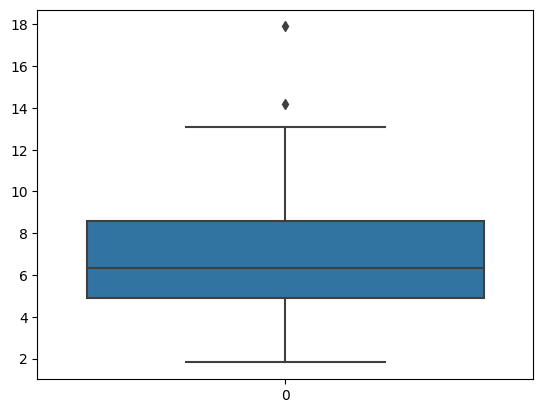

In [ ]:
sns.boxplot(df['health'])

Один из самых заметных выбросов - это затраты на здравоохранение в США, почти 18%, это единственная страна в мире, которая тратит на здравоохранение так много, почти на 20% больше по сравнению со следующей за ней страной (Микронезией). Думаю, США также следует исключить из процесса кластеризации.

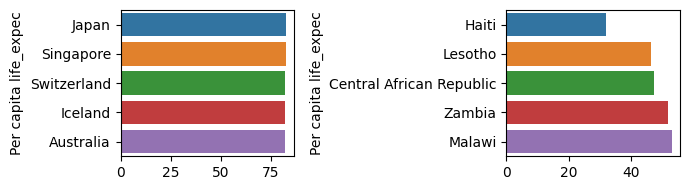

In [ ]:
# ожидаемая продолжительность жизни
fig, ax = plt.subplots(1, 2, figsize=(7, 2))
top10 = df[['country','life_expec']].sort_values('life_expec', ascending = False).head(5)
bottom10 = df[['country','life_expec']].sort_values('life_expec', ascending = True).head(5)
plt1 = sns.barplot(x='life_expec', y='country', data= top10, ax=ax[0])
plt2 = sns.barplot(x='life_expec', y='country', data= bottom10, ax=ax[1])
plt1.set(xlabel = '', ylabel= 'Per capita life_expec')
plt2.set(xlabel = '', ylabel= 'Per capita life_expec')
plt.tight_layout()


<Axes: >

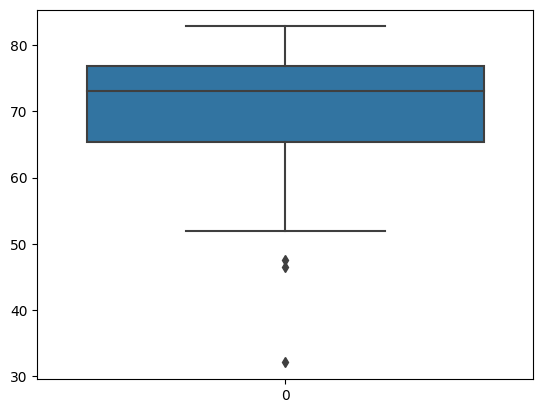

In [ ]:
sns.boxplot(df['life_expec'])

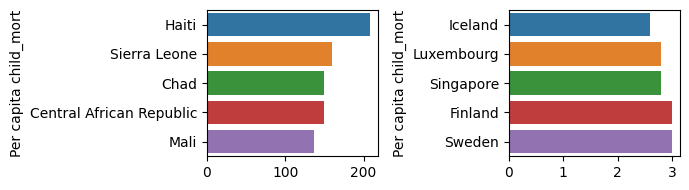

In [ ]:
# рассмотрим показатели поближе, заодно можно будет получить информацию по выбросам
fig, ax = plt.subplots(1, 2, figsize=(7, 2))
top10 = df[['country','child_mort']].sort_values('child_mort', ascending = False).head(5)
bottom10 = df[['country','child_mort']].sort_values('child_mort', ascending = True).head(5)
plt1 = sns.barplot(x='child_mort', y='country', data= top10, ax=ax[0])
plt2 = sns.barplot(x='child_mort', y='country', data= bottom10, ax=ax[1])
plt1.set(xlabel = '', ylabel= 'Per capita child_mort')
plt2.set(xlabel = '', ylabel= 'Per capita child_mort')
plt.tight_layout()


На боксплоте видно несколько явных выбросов, один из них - это Гаити, где наблюдается экстремально низкая ожидаемая продолжительность жизни. В этот же год в Гаити зарегистрирована очень высокая детская смертность (280), что уходит в отрыв от всех остальных стран. Исторически, такая ситуация была на Гаити в 2010 году, когда случилось землетрясение с колоcсальным количеством жертв. Думаю, Гаити нужно исключить из анализа, поскольку это нетривиальный случай, он будет сильно влиять на кластеризацию.
Кроме того, мне кажется резонным убрать из анализа Сингапур и Катар, т. к. в данных странах очень высокая продолжительность жизни, вместе с низкими (относительно ВВП) затратами на здравоохранение.

In [ ]:
df_cleaned = df.copy()


In [ ]:
df_cleaned = df_cleaned[(df_cleaned['health']< 15)&(df_cleaned['life_expec']> 45)].dropna()
df_cleaned = df_cleaned[(df_cleaned['country'] !='Singapore')].dropna()
df_cleaned = df_cleaned[(df_cleaned['country'] !='Qatar')].dropna()
# в итоге удалены Гаити, Сингапур, Катар и США

In [ ]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 163 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     163 non-null    object 
 1   child_mort  163 non-null    float64
 2   exports     163 non-null    float64
 3   health      163 non-null    float64
 4   imports     163 non-null    float64
 5   income      163 non-null    int64  
 6   inflation   163 non-null    float64
 7   life_expec  163 non-null    float64
 8   total_fer   163 non-null    float64
 9   gdpp        163 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 14.0+ KB


<Axes: xlabel='health', ylabel='life_expec'>

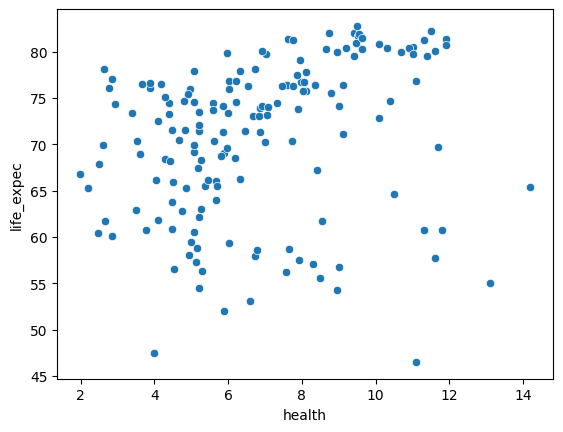

In [ ]:
X = df_cleaned[['health', 'life_expec']]
sns.scatterplot(x=df_cleaned['health'], y=df_cleaned['life_expec'])
#скаттер показателей без выбросов

In [ ]:
X = df_cleaned[['health', 'life_expec']]
# готовый датасет для кластеризации

#Кластеризация с помощью KMeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<Axes: xlabel='health', ylabel='life_expec'>

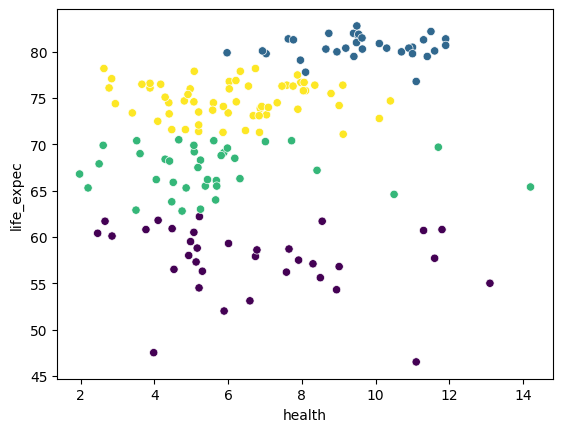

In [ ]:
# инициализируем алгоритм k-means с количеством кластеров 4
kmeans = KMeans(n_clusters=4, random_state=10)

predictions = kmeans.fit_predict(X)
predictions = kmeans.labels_
df_cleaned['Clusters_k3'] = predictions

sns.scatterplot(x=df_cleaned['health'], y=df_cleaned['life_expec'], c=predictions)
# видно, что разделение кластеров произошло в большей степени по ожидаемой продолжительности жизни

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

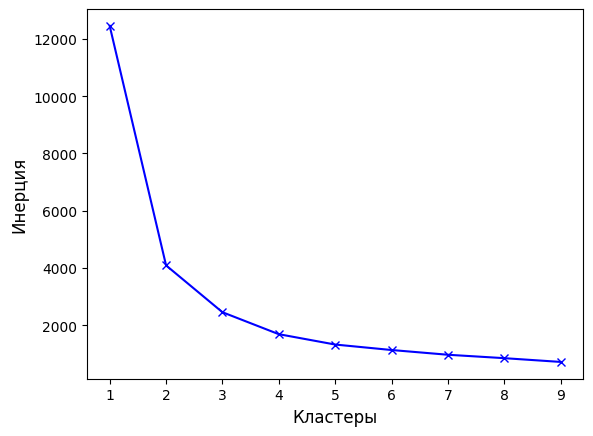

In [ ]:
# попробуем определить подходящее количество кластеров с помощью метода инерции
def get_inertia(cluster_num, X):
    k_means = KMeans(n_clusters=cluster_num, random_state=42)
    k_means.fit(X)
    inertia = k_means.inertia_
    return inertia

inertia = []
for cluster_num in range(1, 10):
    inertia.append(get_inertia(cluster_num, X))

# визуализируем, как менялась инерция в зависимости от количества кластеров
plt.xlabel("Кластеры", fontsize=12)
plt.ylabel("Инерция", fontsize=12)
plt.plot([i for i in range(1, 10)], inertia, 'xb-')
plt.show()

#на мой взгляд оптимальным является деление на 4 кластера

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

<Axes: xlabel='cluster', ylabel='silhouette'>

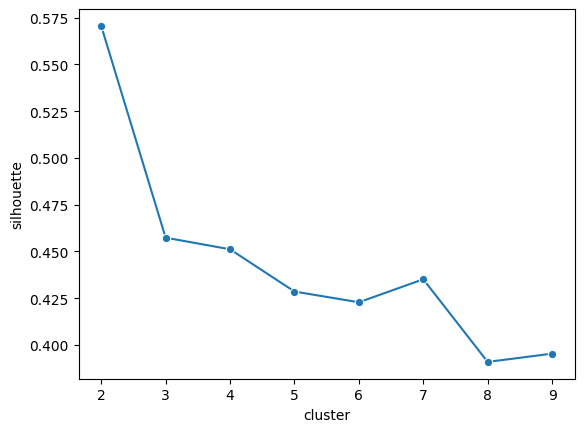

In [ ]:
# расчет методом силуэта
from sklearn.metrics import silhouette_score

def get_silhouette(cluster_num, X):
    k_means =  KMeans(n_clusters=cluster_num, random_state=42)
    k_means.fit(X)
    silhouette = silhouette_score(X, k_means.predict(X))
    return silhouette

silhouette_res = {"silhouette": [], "cluster": []}

X = df_cleaned[['health', 'life_expec']]

for cluster_num in range(2, 10):
    silhouette_res["silhouette"].append(get_silhouette(cluster_num, X))
    silhouette_res["cluster"].append(cluster_num)

# сохраним в датафрейм значение силуэта и количество кластеров
silhouette_df = pd.DataFrame(silhouette_res)

# визуализируем зависимость значения инерции от количества кластеров
sns.lineplot(data=silhouette_df, x="cluster", y="silhouette", marker= "o")

#оптимальным является деление на 2-3 кластера

#Иерархическая кластеризация

In [ ]:
X = df_cleaned[['health', 'life_expec']]
# готовый датасет для кластеризации

<Axes: xlabel='health', ylabel='life_expec'>

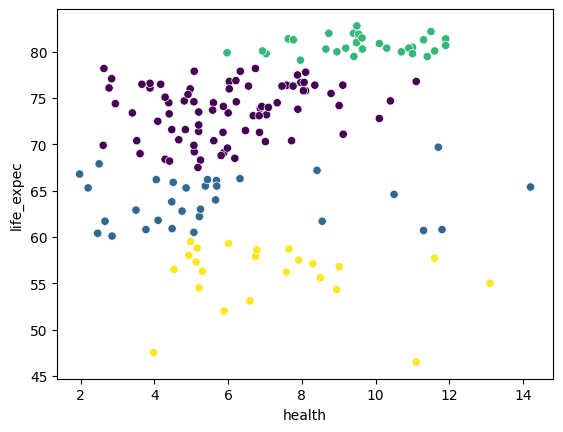

In [ ]:
from sklearn.cluster import AgglomerativeClustering

clustering = AgglomerativeClustering(4)

predictions = clustering.fit_predict(X)
predictions = clustering.labels_

# сохраним предсказания в датафрейм
df_cleaned['Clusters_agg'] = predictions

# визуализируем результаты
sns.scatterplot(x=df_cleaned['health'], y=df_cleaned['life_expec'], c=predictions)

#внешне результаты очень похожи на те, что были получены с алгоритмом k-means

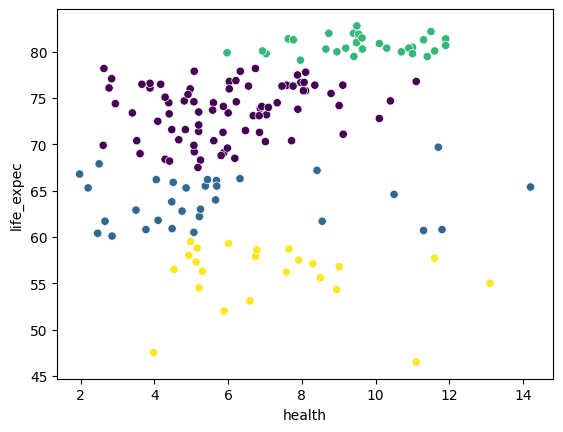

In [ ]:
clustering = AgglomerativeClustering(n_clusters=4, linkage='ward')
# попробую провести кластеризацию с использованием различных алгоритмов агломеративного снижения (ward, complete, average, single)

predictions = clustering.fit_predict(X)

predictions = clustering.labels_

# сохраним предсказания в датафрейм
df_cleaned['Clusters_agg'] = predictions

# визуализируем результаты
sns.scatterplot(x=df_cleaned['health'], y=df_cleaned['life_expec'], c=predictions)
plt.show()
#изменение linkage не дало улучшения

In [ ]:
df_cleaned['Clusters_agg'].value_counts()

0    79
1    31
2    30
3    23
Name: Clusters_agg, dtype: int64

In [ ]:
df_cleaned.loc[df_cleaned['Clusters_agg']==1]
# код для того, чтобы посмотреть на полученные кластеры

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Clusters_k3,Clusters_agg
3,Angola,119.0,62.300,2.85,42.9000,5900,22.400,60.1,6.16,3530,0,1
17,Benin,111.0,23.800,4.10,37.2000,1820,0.885,61.8,5.36,758,0,1
27,Cambodia,44.4,54.100,5.68,59.5000,2520,3.120,66.1,2.88,786,2,1
36,Comoros,88.2,16.500,4.51,51.7000,1410,3.870,65.9,4.75,769,2,1
38,"Congo, Rep.",63.9,85.100,2.46,54.7000,5190,20.700,60.4,4.95,2740,0,1
49,Equatorial Guinea,111.0,85.800,4.48,58.9000,33700,24.900,60.9,5.21,17100,0,1
50,Eritrea,55.2,4.790,2.66,23.3000,1420,11.600,61.7,4.61,482,0,1
52,Fiji,24.1,57.800,4.86,63.9000,7350,4.230,65.3,2.67,3650,2,1
55,Gabon,63.7,57.700,3.50,18.9000,15400,16.600,62.9,4.08,8750,2,1
56,Gambia,80.3,23.800,5.69,42.7000,1660,4.300,65.5,5.71,562,2,1


In [ ]:
predictions

array([3, 0, 0, 1, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 3,
       0, 0, 0, 3, 3, 1, 3, 2, 0, 3, 3, 2, 0, 0, 1, 3, 1, 2, 3, 0, 2, 0,
       2, 0, 0, 0, 0, 1, 1, 0, 1, 2, 2, 1, 1, 0, 2, 1, 2, 0, 0, 3, 3, 1,
       0, 2, 1, 0, 0, 1, 2, 2, 2, 0, 2, 0, 0, 1, 1, 0, 0, 1, 0, 2, 3, 1,
       0, 0, 2, 0, 1, 3, 0, 0, 3, 2, 0, 0, 1, 1, 1, 0, 0, 3, 1, 3, 0, 2,
       2, 3, 1, 2, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 1, 0, 0, 3, 0,
       2, 1, 3, 2, 2, 0, 0, 1, 0, 2, 2, 0, 3, 0, 0, 3, 0, 0, 0, 1, 3, 0,
       0, 2, 0, 0, 1, 0, 0, 0, 3])

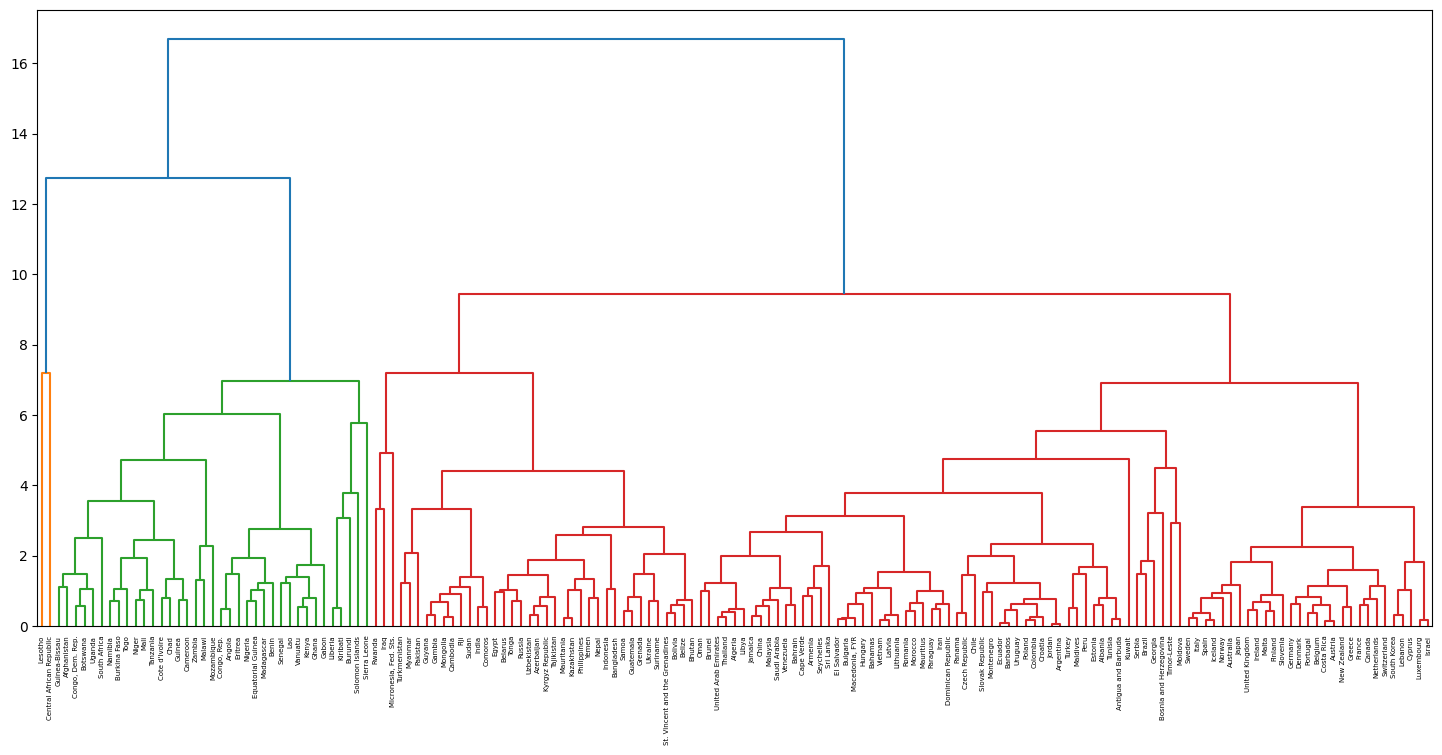

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

# рассчитаем расстояния между кластерами
linked = linkage(X, 'average')

plt.figure(figsize=(18, 8))

# сначала будут отрисовываться кластеры с минимальным расстоянием между ними
dendrogram(Z=linked,
            orientation='top',
            labels=df_cleaned['country'].values,
            distance_sort='descending')

plt.show()

# выделен отдельный кластер стран с очень низкой продолжительностью жизни и низкими тратами на здравоохраниение, и, как видно, практически все эти страны расположены на Африканском континенте

# DBSCAN

<Axes: xlabel='health', ylabel='life_expec'>

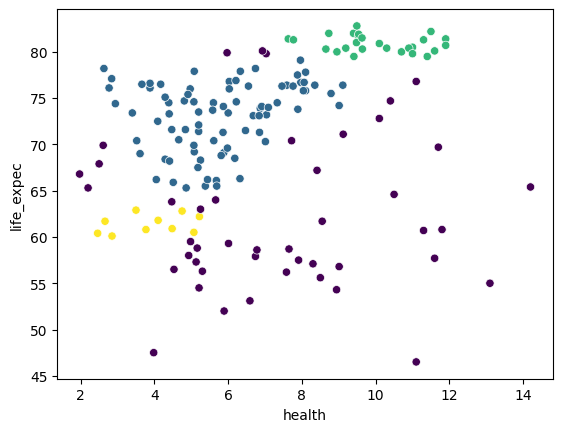

In [ ]:
from sklearn.cluster import DBSCAN

# Запускаем кластеризацию на наших данных, минимальное количество образцов выбрано 4 (рекомендовано для 2-мерного датасета),
# параметр эпсилон подбирался вручную, и наилучшее значение
dbscan = DBSCAN(eps=1.5, min_samples=7)

dbscan_pred = dbscan.fit_predict(df_cleaned[['health', 'life_expec']])

df_cleaned['dbscan'] = dbscan_pred


# Далее можно визуализировать результаты, как мы делали это с алгоритмом k-means
sns.scatterplot(x=df_cleaned['health'], y=df_cleaned['life_expec'], c=dbscan_pred)

In [ ]:
df_cleaned['dbscan'].value_counts()

 0    82
-1    45
 1    26
 2    10
Name: dbscan, dtype: int64

In [ ]:
df_cleaned.loc[df_cleaned['dbscan']==-1]
# код для того, чтобы посмотреть на полученные кластеры

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Clusters_k3,Clusters_agg,dbscan
0,Afghanistan,90.2,10.000,7.58,44.9000,1610,9.440,56.2,5.82,553,0,3,-1
20,Bosnia and Herzegovina,6.9,29.700,11.10,51.3000,9720,1.400,76.8,1.31,4610,1,0,-1
21,Botswana,52.5,43.600,8.30,51.3000,13300,8.920,57.1,2.88,6350,0,3,-1
25,Burkina Faso,116.0,19.200,6.74,29.6000,1430,6.810,57.9,5.87,575,0,3,-1
26,Burundi,93.6,8.920,11.60,39.2000,764,12.300,57.7,6.26,231,0,3,-1
28,Cameroon,108.0,22.200,5.13,27.0000,2660,1.910,57.3,5.11,1310,0,3,-1
31,Central African Republic,149.0,11.800,3.98,26.5000,888,2.010,47.5,5.21,446,0,3,-1
32,Chad,150.0,36.800,4.53,43.5000,1930,6.390,56.5,6.59,897,0,3,-1
37,"Congo, Dem. Rep.",116.0,41.100,7.91,49.6000,609,20.800,57.5,6.54,334,0,3,-1
40,Cote d'Ivoire,111.0,50.600,5.30,43.3000,2690,5.390,56.3,5.27,1220,0,3,-1


In [ ]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

In [ ]:
# ниже использован метод подбора эпсилон, описанный здесь https://medium.com/@tarammullin/dbscan-parameter-estimation-ff8330e3a3bd
neighbors = NearestNeighbors(n_neighbors=4)
neighbors_fit = neighbors.fit(df_cleaned[['health', 'life_expec']])
distances, indices = neighbors_fit.kneighbors(df_cleaned[['health', 'life_expec']])

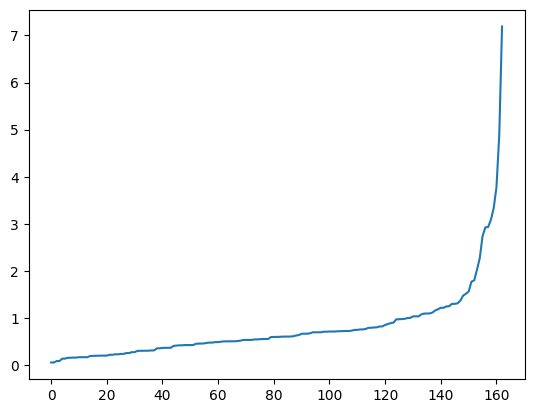

In [ ]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
# согласно графику, оптимальное значение эпсилона  в районе от 1 до 1.5, похожее значение было подобрано вручную

# Визуализация результатов и выводы

In [ ]:
df_cleaned

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Clusters_k3,Clusters_agg,dbscan
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0,3,-1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,3,0,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,3,0,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0,1,2
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,2,1,-1
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,3,0,0
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,3,0,0
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,2,0,0


In [ ]:
df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

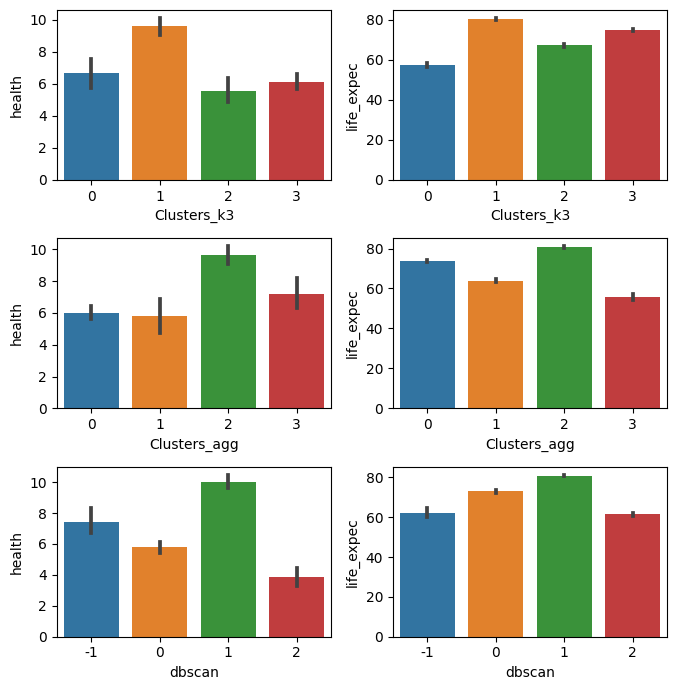

In [ ]:
# рассмотрим показатели поближе, заодно можно будет получить информацию по выбросам
fig, ax = plt.subplots(3, 2, figsize=(7, 7))

plt1 = sns.barplot(y='health', x='Clusters_k3', data= df_cleaned, ax=ax[0,0])
plt11 = sns.barplot(y='life_expec', x='Clusters_k3', data= df_cleaned, ax=ax[0,1])

plt2 = sns.barplot(y='health', x='Clusters_agg', data= df_cleaned, ax=ax[1,0])
plt22 = sns.barplot(y='life_expec', x='Clusters_agg', data= df_cleaned, ax=ax[1,1])

plt3 = sns.barplot(y='health', x='dbscan', data= df_cleaned, ax=ax[2,0])
plt33 = sns.barplot(y='life_expec', x='dbscan', data= df_cleaned, ax=ax[2,1])

plt.tight_layout()


Выше видны результаты кластеризации с помощью алгоритмов k-means агломеративного снижения и DBSCAN. Наибольшего разделения кластеров по величине трат на ЗОХ (здравоохранение) удалось добиться только с алгоритмом DBSCAN.
С применением DBSCAN удалось найти 4 кластера:
1. Страны с очень высокой продолжительностью жизни, и очень высокими тратами на здравоохранение (1)
2. Страны с очень низкой продолжительностью жизни и очень низкими тратами на здравоохранение (2).
3. Страны с невысокими тратами на здравоохранение, но относительно высокой продолжительностью жизни (0).
4. Страны с высокими тратами на здравоохранение, но относительно низкой продолжительностью жизни (-1).

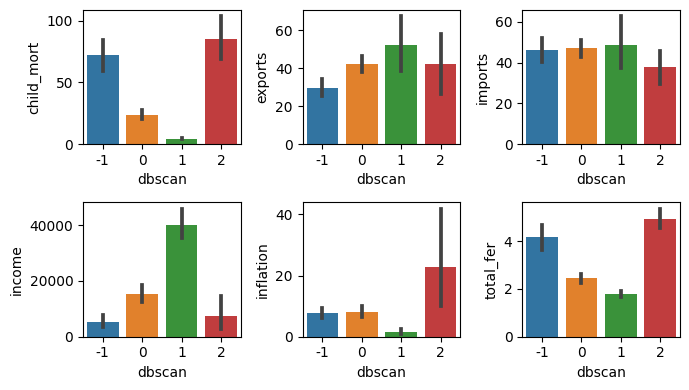

In [ ]:
# визуализируем результаты
features = ['health', 'life_expec', 'child_mort', 'exports', 'imports', 'income',
       'inflation', 'total_fer', 'gdpp']

fig, ax = plt.subplots(2, 3, figsize=(7, 4))

plt1 = sns.barplot(y='child_mort', x='dbscan', data= df_cleaned, ax=ax[0,0])
plt2 = sns.barplot(y='exports', x='dbscan', data= df_cleaned, ax=ax[0,1])
plt3 = sns.barplot(y='imports', x='dbscan', data= df_cleaned, ax=ax[0,2])
plt4 = sns.barplot(y='income', x='dbscan', data= df_cleaned, ax=ax[1,0])
plt5 = sns.barplot(y='inflation', x='dbscan', data= df_cleaned, ax=ax[1,1])
plt6 = sns.barplot(y='total_fer', x='dbscan', data= df_cleaned, ax=ax[1,2])

plt.tight_layout()


Выше видны результаты кластеризации с помощью алгоритмов k-means агломеративного снижения и DBSCAN. Наибольшего разделения кластеров по величине трат на ЗОХ (здравоохранение) удалось добиться только с применением алгоритма DBSCAN.
С применением DBSCAN удалось найти 4 кластера:

Страны с очень **высокой** продолжительностью жизни, и очень **высокими** тратами на здравоохранение (1)  для них характерны очень низкая детская рождаемость и смертность, высокий экспорт и импорт, очень высокие доходы, низкая инфляция.  Примерами стран, которые входят в кластер 1, являются страны ЕС, Япония, Австралия.

Страны с очень **низкой** продолжительностью жизни и очень **низкими** тратами на здравоохранение (2). Для стран из данного кластера напротив, характерны очень высокая детская рождаемость и смертность, низкий доход и высокая инфляция. Примерами стран, которые входят в кластер 2, являются Нигерия, Эритрея, Габон.

Страны с **невысокими** тратами на здравоохранение, но **относительно высокой **продолжительностью жизни (0). Для таких стран характерна умеренные детская рождаемость и смертность, средний доход и относительно невысокая инфляция. Пример: Россия, Беларусь, Бразилия. Это самый многочисленный кластер.

Страны с **высокими** тратами на здравоохранение, но относительно **низкой** продолжительностью жизни (-1). Для стран из кластера -1, характерны очень  детская рождаемость и смертность, низкий доход, но и относительно низкая инфляция. Это самая разнородная группа, в нее входят Ирак, ЮАРПакистан.